<a href="https://colab.research.google.com/github/satishgc227/Problem-statement-1-of-Horses/blob/main/Problem_statement_1_of_NYRA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopy.distance
from tqdm.auto import tqdm
tqdm.pandas()
from tqdm.auto import tqdm
tqdm.pandas()
!pip install utm
import utm
import plotly.graph_objects as go
import math

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df=pd.read_csv("/content/edited complete.csv",encoding='latin1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()


,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds,position_at_finish
0,AQU,01-01-2019,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090,8
1,AQU,01-01-2019,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090,8
2,AQU,01-01-2019,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090,8
3,AQU,01-01-2019,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090,8
4,AQU,01-01-2019,9,6,65,40.672596,-73.827742,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090,8


data.shape

In [ ]:
df.shape

(1048575, 18)

In [ ]:
df.isnull().sum()

track_id               0
race_date              0
race_number            0
program_number         0
trakus_index           0
latitude               0
longitude              0
distance_id            0
course_type            0
track_condition        0
run_up_distance        0
race_type              0
purse                  0
post_time              0
weight_carried         0
jockey                 0
odds                   0
position_at_finish     0
dtype: int64

In [ ]:
data = df.dropna(how='any',axis=0) 

In [ ]:
df.isnull().sum()

track_id               0
race_date              0
race_number            0
program_number         0
trakus_index           0
latitude               0
longitude              0
distance_id            0
course_type            0
track_condition        0
run_up_distance        0
race_type              0
purse                  0
post_time              0
weight_carried         0
jockey                 0
odds                   0
position_at_finish     0
dtype: int64

  0%|          | 0/3 [00:00<?, ?it/s]

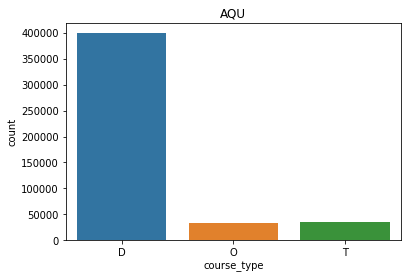

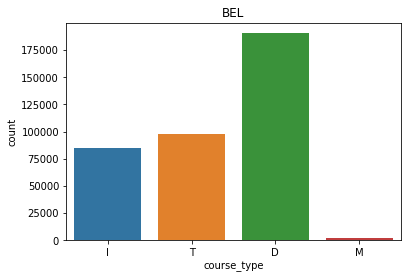

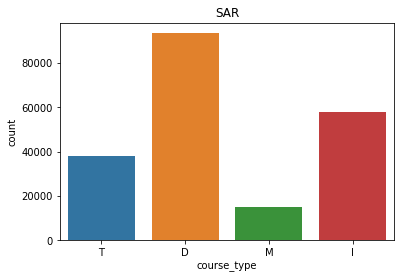

In [ ]:
for t  in tqdm(df.track_id.unique()):
    sns.countplot(data = df[df.track_id == t], x='course_type')
    plt.title(t)
    plt.show()

Text(0.5, 1.0, 'Track name : SAR')

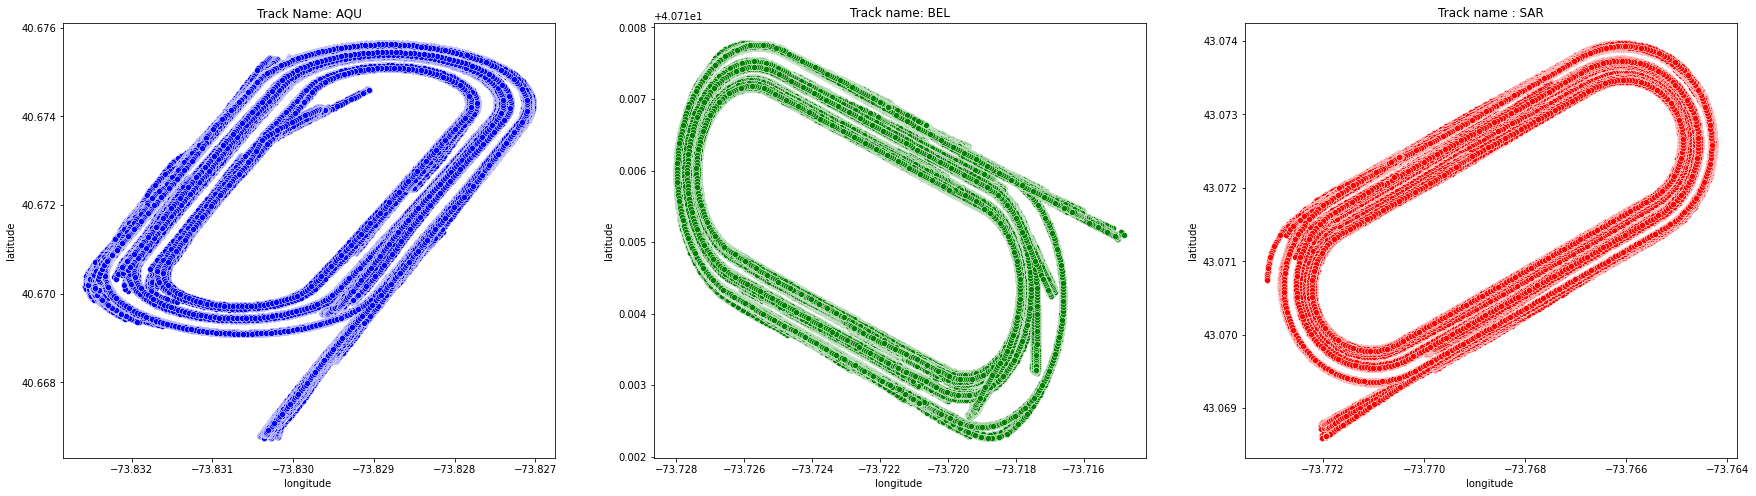

In [ ]:
fig = plt.subplots(nrows = 1, ncols = 3, figsize = (30,8))

plt.subplot(1,3,1)
df1 = df[df['track_id'] == 'AQU']
sns.scatterplot(data =df1, x = 'longitude\xa0', y = 'latitude\xa0',color='Blue')
plt.title("Track Name: {}".format('AQU'))

plt.subplot(1,3,2)
df2=df[df['track_id'] == 'BEL']
sns.scatterplot(data=df2,x='longitude\xa0', y = 'latitude\xa0',color='Green')
plt.title("Track name: {}".format('BEL'))

plt.subplot(1,3,3)
df3=df[df['track_id']=='SAR']
sns.scatterplot(data=df3 ,x='longitude\xa0', y = 'latitude\xa0',color='Red')
plt.title("Track name : {}".format("SAR"))

In [ ]:
# Taking the sample of data
df.race_date = pd.to_datetime(df.race_date)
sample_data=df[(df['track_id'] == 'AQU') & (df['race_number\xa0'] == 1) & (df['race_date'] == '2019-03-23')]
sample_data
# Selecting three horses from the sample data
program_number_1 = sample_data[sample_data['program_number\xa0']== '1'].sort_values('trakus_index\xa0')
program_number_2 = sample_data[sample_data['program_number\xa0']=='2'].sort_values('trakus_index\xa0')
program_number_4= sample_data[sample_data['program_number\xa0']=='4'].sort_values('trakus_index\xa0')



colors = ['red', 'green', 'blue']

data_trace0 = go.Scatter(x = program_number_1['longitude\xa0'], y = program_number_1['latitude\xa0'], mode = 'lines', line = {'width': 2, 'color': colors[0]}, name = 'Horse_1' )
data_trace1 = go.Scatter(x = program_number_2['longitude\xa0'], y = program_number_2['latitude\xa0'], mode = 'lines', line = {'width': 2, 'color': colors[1]}, name = 'Horse_2' )
data_trace2 = go.Scatter(x = program_number_4['longitude\xa0'], y = program_number_4['latitude\xa0'], mode = 'lines', line = {'width': 2, 'color': colors[2]}, name = 'Horse_3' )

data = [data_trace0, data_trace1, data_trace2]
layout = go.Layout(xaxis = {'range': [-73.833, -73.827], 'autorange': False, 'zeroline': False, 'title': 'Longitude\xa0'},
                   yaxis = {'range': [40.665, 40.676], 'autorange': False, 'zeroline': False, 'title': 'Latitude\xa0'},
                   title = 'Live race in track: AQU',
                   updatemenus = [{'type': 'buttons', 'buttons': [{'label': 'play', 'method': 'animate', 'args': [None, {'frame': {'duration': 40, 'transistion': 100}}]}] }])

horse_xx_1 = np.array(program_number_1['longitude\xa0'])
horse_yy_1 = np.array(program_number_1['latitude\xa0'])

horse_xx_2 = np.array(program_number_2['longitude\xa0'])
horse_yy_2 = np.array(program_number_2['latitude\xa0'])

horse_xx_3 = np.array(program_number_4['longitude\xa0'])
horse_yy_3 = np.array(program_number_4['latitude\xa0'])

frames = [go.Frame(data = [
    go.Scatter(x = [horse_xx_1[k]], y = [horse_yy_1[k]], mode = 'markers', marker = {'color': colors[0], 'size': 10, 'symbol': 'triangle-up'}),
    go.Scatter(x = [horse_xx_2[k]], y = [horse_yy_2[k]], mode = 'markers', marker = {'color': colors[1], 'size': 10, 'symbol': 'diamond-open'}),
    go.Scatter(x = [horse_xx_3[k]], y = [horse_yy_3[k]], mode = 'markers', marker = {'color': colors[2], 'size': 10, 'symbol': 'circle-open'})

]) for k in range(387)]

fig = go.Figure(data = data, layout = layout, frames = frames)

fig.show()


In [ ]:
df['xy'] = np.array(utm.from_latlon(df['latitude\xa0'].values, df['longitude\xa0'].values)[:2]).T.tolist()

In [ ]:
def get_speed(points):
    speed = [0]
    points = points.values
    for i in range(1, len(points)):
        speed.append(np.linalg.norm(np.array(points[i]) - np.array(points[i-1])))
    return speed

df['speed'] = tqdm(get_speed(df['xy']))
df


  0%|          | 0/1048575 [00:00<?, ?it/s]

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds,position_at_finish,xy,speed
0,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090,8,"[599088.5386649157, 4503112.780000094]",0.000000
1,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090,8,"[599090.1000253508, 4503117.721518921]",5.182321
2,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090,8,"[599072.8089421953, 4503064.139362002]",56.303011
3,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090,8,"[599074.3909913921, 4503068.925715356]",5.041037
4,AQU,2019-01-01,9,6,65,40.672596,-73.827742,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090,8,"[599075.9668556151, 4503073.731971427]",5.058008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,AQU,2019-02-28,2,4,328,40.672994,-73.831256,800,D,FT,54,STR,55000,122,122,Eric Cancel,1450,3,"[598778.3744921176, 4503114.026484733]",4.206935
1048571,AQU,2019-02-28,2,4,317,40.673395,-73.831081,800,D,FT,54,STR,55000,122,122,Eric Cancel,1450,3,"[598792.5503705675, 4503158.678811788]",46.848542
1048572,AQU,2019-02-28,2,4,318,40.673359,-73.831097,800,D,FT,54,STR,55000,122,122,Eric Cancel,1450,3,"[598791.2605855855, 4503154.723555602]",4.160240
1048573,AQU,2019-02-28,2,4,319,40.673323,-73.831114,800,D,FT,54,STR,55000,122,122,Eric Cancel,1450,3,"[598789.948285497, 4503150.681399761]",4.249842


In [ ]:
def getAngle(a, b, c):
    ang = 180-math.degrees(math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0]))
    if ang < -180:
        ang += 360
    if ang > 180:
        ang -= 360
    
    return ang
def get_turning_angle(points):
    turning_angle = [0]
    for i in range(1, len(points.values) - 1):
        turning_angle.append(getAngle(points.values[i-1], points.values[i], points.values[i+1]))
    turning_angle.append(0)
    return turning_angle

df['turning_angle'] = df.groupby(['track_id', 'race_date', 'race_number\xa0'])['xy'].progress_transform(get_turning_angle)
df

#dfr=getAngle([200,300],[400,508],[600,700])
#dfr

  0%|          | 0/1030 [00:00<?, ?it/s]

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,...,race_type,purse,post_time,weight_carried,jockey,odds,position_at_finish,xy,speed,turning_angle
0,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,...,CLM,25000,420,120,Andre Shivnarine Worrie,2090,8,"[599088.5386649157, 4503112.780000094]",0.000000,0.000000
1,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,...,CLM,25000,420,120,Andre Shivnarine Worrie,2090,8,"[599090.1000253508, 4503117.721518921]",5.182321,-179.649847
2,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,...,CLM,25000,420,120,Andre Shivnarine Worrie,2090,8,"[599072.8089421953, 4503064.139362002]",56.303011,-179.594567
3,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,...,CLM,25000,420,120,Andre Shivnarine Worrie,2090,8,"[599074.3909913921, 4503068.925715356]",5.041037,-0.137277
4,AQU,2019-01-01,9,6,65,40.672596,-73.827742,600,D,GD,...,CLM,25000,420,120,Andre Shivnarine Worrie,2090,8,"[599075.9668556151, 4503073.731971427]",5.058008,-0.074045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,AQU,2019-02-28,2,4,328,40.672994,-73.831256,800,D,FT,...,STR,55000,122,122,Eric Cancel,1450,3,"[598778.3744921176, 4503114.026484733]",4.206935,-179.624933
1048571,AQU,2019-02-28,2,4,317,40.673395,-73.831081,800,D,FT,...,STR,55000,122,122,Eric Cancel,1450,3,"[598792.5503705675, 4503158.678811788]",46.848542,-179.552371
1048572,AQU,2019-02-28,2,4,318,40.673359,-73.831097,800,D,FT,...,STR,55000,122,122,Eric Cancel,1450,3,"[598791.2605855855, 4503154.723555602]",4.160240,-0.074628
1048573,AQU,2019-02-28,2,4,319,40.673323,-73.831114,800,D,FT,...,STR,55000,122,122,Eric Cancel,1450,3,"[598789.948285497, 4503150.681399761]",4.249842,-0.064871


In [ ]:
df_prev = df[['track_id', 'race_date', 'race_number\xa0', 'trakus_index\xa0', 'xy']].copy()
df_prev['trakus_index\xa0'] = df_prev['trakus_index\xa0'] + 1
df = pd.merge(df, df_prev, on=['track_id', 'race_date', 'race_number\xa0', 'trakus_index\xa0'], suffixes=['', '_prev'], how='left')

In [ ]:
df['xy_pair'] = df.progress_apply(lambda row: [np.array(row['xy_prev']), np.array(row['xy'])], axis=1)
df

  0%|          | 0/4240729 [00:00<?, ?it/s]

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,...,post_time,weight_carried,jockey,odds,position_at_finish,xy,speed,turning_angle,xy_prev,xy_pair
0,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,...,420,120,Andre Shivnarine Worrie,2090,8,"[599088.5386649157, 4503112.780000094]",0.000000,0.000000,"[599084.8399827544, 4503105.263027617]","[[599084.8399827544, 4503105.263027617], [5990..."
1,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,...,420,120,Andre Shivnarine Worrie,2090,8,"[599088.5386649157, 4503112.780000094]",0.000000,0.000000,"[599083.1163847113, 4503105.449879247]","[[599083.1163847113, 4503105.449879247], [5990..."
2,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,...,420,120,Andre Shivnarine Worrie,2090,8,"[599088.5386649157, 4503112.780000094]",0.000000,0.000000,"[599091.6353350347, 4503107.314391549]","[[599091.6353350347, 4503107.314391549], [5990..."
3,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,...,420,120,Andre Shivnarine Worrie,2090,8,"[599088.5386649157, 4503112.780000094]",0.000000,0.000000,"[599089.1209733896, 4503110.001002659]","[[599089.1209733896, 4503110.001002659], [5990..."
4,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,...,420,120,Andre Shivnarine Worrie,2090,8,"[599088.5386649157, 4503112.780000094]",0.000000,0.000000,"[599089.7309734668, 4503107.617628846]","[[599089.7309734668, 4503107.617628846], [5990..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4240724,AQU,2019-02-28,2,4,319,40.673323,-73.831114,800,D,FT,...,122,122,Eric Cancel,1450,3,"[598789.948285497, 4503150.681399761]",4.249842,-0.064871,"[598785.6039565294, 4503142.049066244]","[[598785.6039565294, 4503142.049066244], [5987..."
4240725,AQU,2019-02-28,2,4,319,40.673323,-73.831114,800,D,FT,...,122,122,Eric Cancel,1450,3,"[598789.948285497, 4503150.681399761]",4.249842,-0.064871,"[598791.2605855855, 4503154.723555602]","[[598791.2605855855, 4503154.723555602], [5987..."
4240726,AQU,2019-02-28,2,4,320,40.673287,-73.831129,800,D,FT,...,122,122,Eric Cancel,1450,3,"[598788.6540464632, 4503146.679453874]",4.206023,0.000000,"[598826.1454114756, 4503258.126746594]","[[598826.1454114756, 4503258.126746594], [5987..."
4240727,AQU,2019-02-28,2,4,320,40.673287,-73.831129,800,D,FT,...,122,122,Eric Cancel,1450,3,"[598788.6540464632, 4503146.679453874]",4.206023,0.000000,"[598784.2186437565, 4503137.839401286]","[[598784.2186437565, 4503137.839401286], [5987..."


In [ ]:
df['xy_pair'][0:4]

0    [[599084.8399827544, 4503105.263027617], [5990...
1    [[599083.1163847113, 4503105.449879247], [5990...
2    [[599091.6353350347, 4503107.314391549], [5990...
3    [[599089.1209733896, 4503110.001002659], [5990...
Name: xy_pair, dtype: object

In [ ]:
def lateral_distance(p1, p2, p3):
    return round(np.cross(p2-p1, p1-p3) / np.linalg.norm(p2-p1), 2)

def longitudinal_distance(p1, p2, p3):
   
def get_lateral_distances(points):
    return [[lateral_distance(point1[0], point1[1], point2[1]) for point2 in points.values] for point1 in points.values]

def get_longitudinal_distances(points):
    return [[longitudinal_distance(point1[0], point1[1], point2[1]) for point2 in points.values] for point1 in points.values]

df['lateral_distances'] = df.groupby(['track_id', 'race_date', 'race_number\xa0', 'trakus_index\xa0'])['xy_pair'].progress_transform(get_lateral_distances)
df['longitudinal_distances'] = df.groupby(['track_id', 'race_date', 'race_number\xao', 'trakus_index\xa0'])['xy_pair'].progress_transform(get_longitudinal_distances)